### **Applying CNN to Multiple images**

The use of Convolutional Neural Netwoks (CNNs) to extract features from grid-like matrix datasets is particularly useful for visual imagery datasets, where patterns play a role.

CNNs consist of multiple layers, such as the input layer, convolution layer, activation layer, pooling layer and fully connected layers.

In this example, we consider applying a CNN to an image, progressing through the convolution layer, activation layer and pooling layer operations to extract the inside feature, in this case an edge feature.

The following notebook is a demonstration of the prototype feature detection workflow applied to satellite imagery. The following steps are executed by the code:

*   Import the necessary libraries
*   Locate the images in the file directory
*   Set the parameter
*   Define the kernal
*   Load the image and plot it
*   Reformat the image
*   Apply the convolution layer operation and plot the output image
*   Apply activation layer operation and plot the output image
*   Apply pooling layer operation and plot the output image



sample_images/PIA12885.jpg


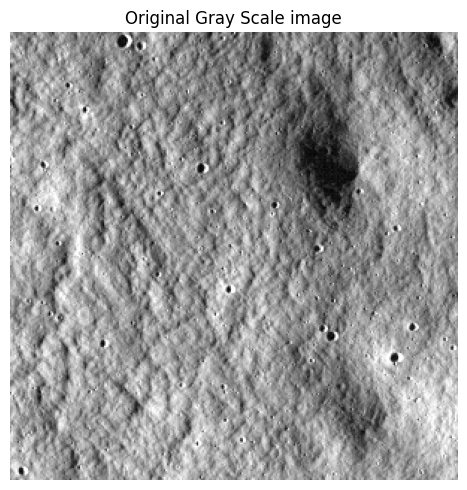

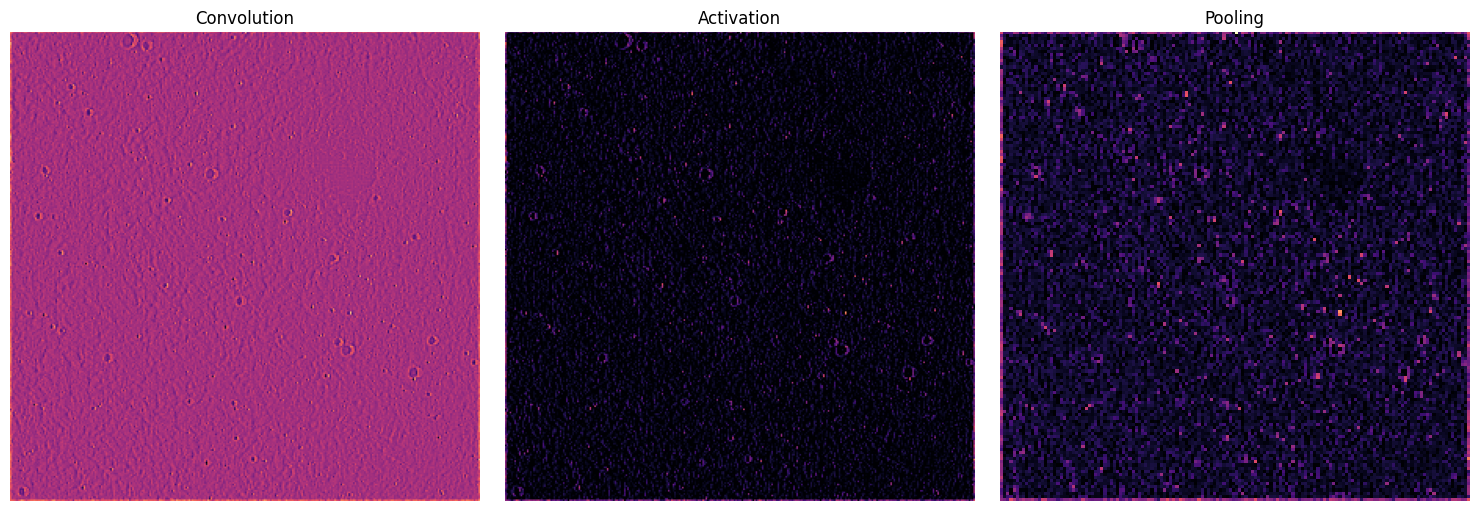

sample_images/PIA12886.jpg


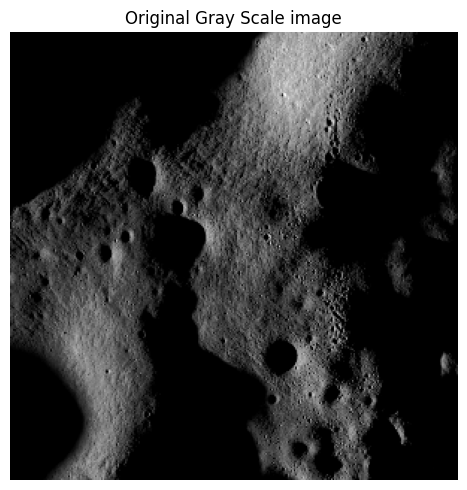

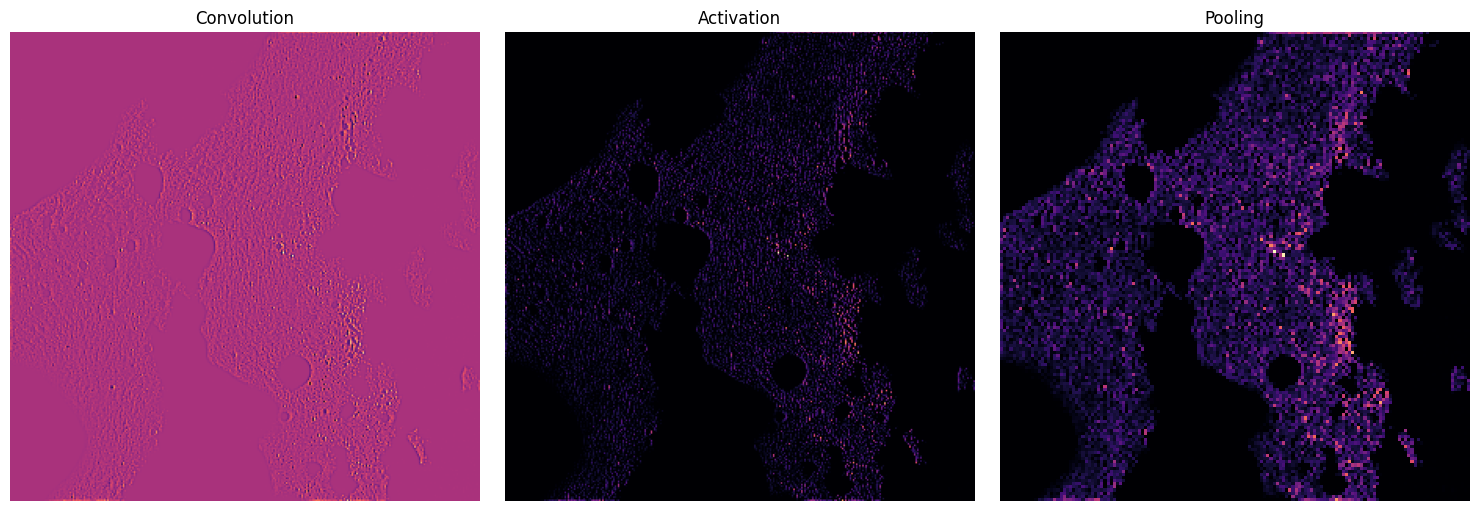

sample_images/PIA12884.jpg


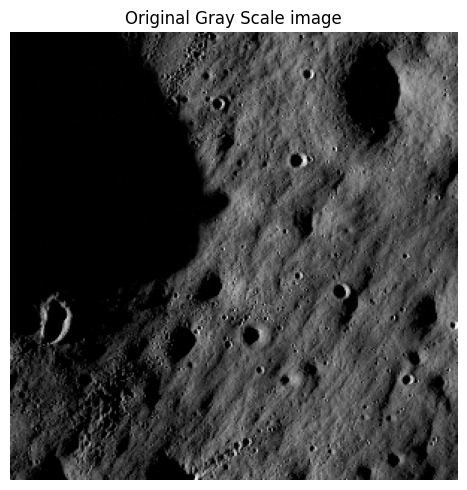

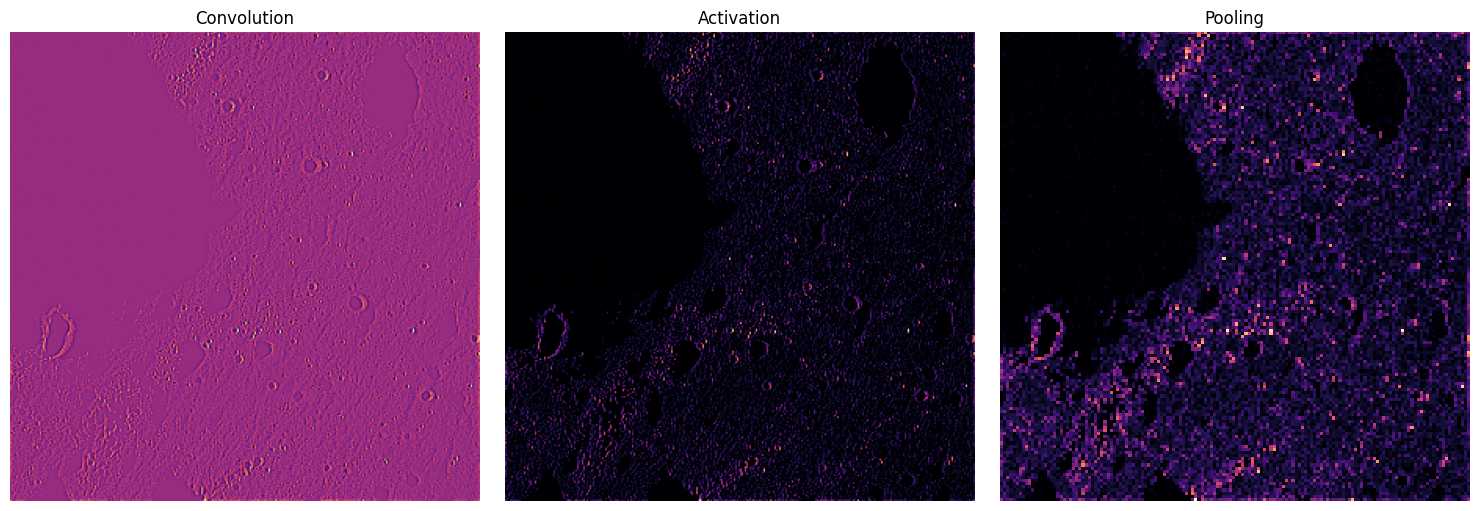

In [1]:

# import the necessary libraries
import os
import fnmatch
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product


# locate the images
for path,dirs,files in os.walk('sample_images'):
    for file in files:
        if fnmatch.fnmatch(file,'*.jpg'):
            fullname = os.path.join(path,file)
            print(fullname)

            # set the param
            plt.rc('figure', autolayout=True)
            plt.rc('image', cmap='magma')

            # define the kernel
            kernel = tf.constant([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1],
                              ])

            # load the image
            image = tf.io.read_file(fullname)
            image = tf.io.decode_jpeg(image, channels=1)
            image = tf.image.resize(image, size=[300, 300])

            # plot the image
            img = tf.squeeze(image).numpy()
            plt.figure(figsize=(5, 5))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title('Original Gray Scale image')
            plt.show();


            # Reformat
            image = tf.image.convert_image_dtype(image, dtype=tf.float32)
            image = tf.expand_dims(image, axis=0)
            kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
            kernel = tf.cast(kernel, dtype=tf.float32)

            # convolution layer
            conv_fn = tf.nn.conv2d

            image_filter = conv_fn(
                input=image,
                filters=kernel,
                strides=1, # or (1, 1)
                padding='SAME',
            )

            plt.figure(figsize=(15, 5))

            # Plot the convolved image
            plt.subplot(1, 3, 1)

            plt.imshow(
                tf.squeeze(image_filter)
            )
            plt.axis('off')
            plt.title('Convolution')

            # activation layer
            relu_fn = tf.nn.relu
            # Image detection
            image_detect = relu_fn(image_filter)

            plt.subplot(1, 3, 2)
            plt.imshow(
                # Reformat for plotting
                tf.squeeze(image_detect)
            )

            plt.axis('off')
            plt.title('Activation')

            # Pooling layer
            pool = tf.nn.pool
            image_condense = pool(input=image_detect,
                                        window_shape=(2, 2),
                                        pooling_type='MAX',
                                        strides=(2, 2),
                                        padding='SAME',
                                        )

            plt.subplot(1, 3, 3)
            plt.imshow(tf.squeeze(image_condense))
            plt.axis('off')
            plt.title('Pooling')
            plt.show()

# New Section